<a href="https://colab.research.google.com/github/Emanuel498/AprendoGit/blob/master/clustering_mall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Referencias:

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python 

https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac 

Link a datos:
https://drive.google.com/file/d/1QY3P4em0U1z3luGUj3cmjRF47GLZPJhk/view?usp=sharing

In [ ]:
# Download and read data
import pandas as pd

from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1QY3P4em0U1z3luGUj3cmjRF47GLZPJhk',dest_path='./data/Mall_Customers.csv')

dataset = pd.read_csv('./data/Mall_Customers.csv')

In [ ]:
# Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the dataset
print( dataset.head() ) 

# Change Genre from Male/Female to 0/1
dataset.loc[ (dataset['Genre'] == "Male"), 'Genre'] = 0
dataset.loc[ (dataset['Genre'] == "Female"), 'Genre'] = 1

# Explore dataset after modification
print( dataset.head() )

# Descriptive statistics of the dataset
dataset.describe().transpose()

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
   CustomerID Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1     0   19                  15                      39
1           2     0   21                  15                      81
2           3     1   20                  16                       6
3           4     1   23                  16                      77
4           5     1   31                  17                      40


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


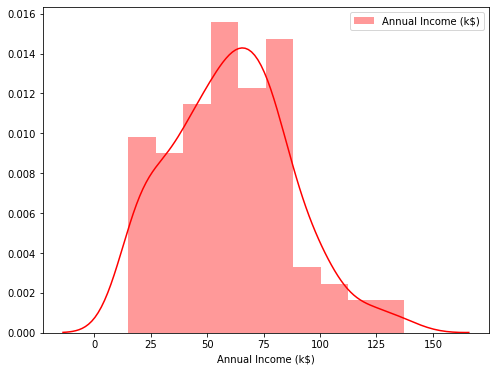

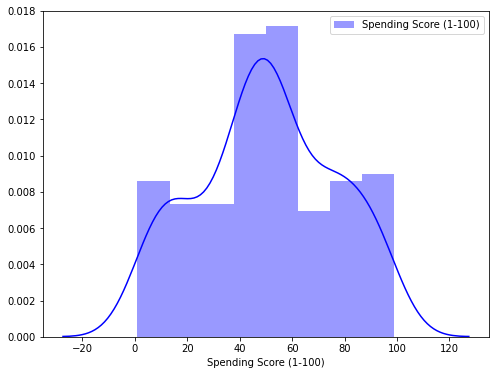

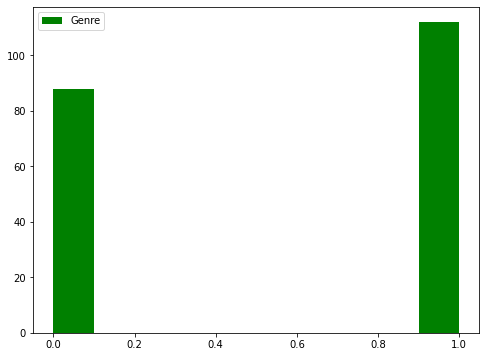

In [ ]:
# Visualizing the data - displot
plt.figure( figsize=(8, 6) )
plot_income = sns.distplot(dataset["Annual Income (k$)"], color='r', label="Annual Income (k$)")
plt.legend()

plt.figure( figsize=(8, 6) )
plot_spend = sns.distplot(dataset["Spending Score (1-100)"], color='b', label="Spending Score (1-100)")
plt.legend()

plt.figure( figsize=(8, 6) )
plt.hist(dataset["Genre"], color='g', label="Genre")
plt.legend()

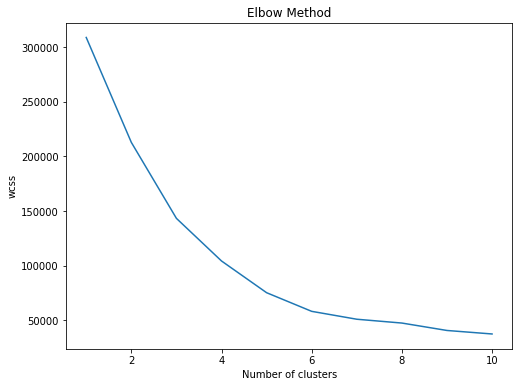

In [ ]:
# Data frame to numpy array
X = dataset.values

# Remove customer id
X = X[:,1:]

# Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure( figsize=(8, 6) )
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

# Ejercicio

Indentificar el número adecuado de clusters (grupos) analizando los resultados que aparecen en las gráficas que aparecen abajo (resultado de la ejecución de la celda que sigue) y la gráfica con la evolución de la función de clustering mediante el método del codo.


 Cluster centroids ------------- 
      Genre        Age  Anual Income  Spending Score
0  0.565217  46.165217     59.365217       32.886957
1  0.552941  28.952941     62.176471       73.623529




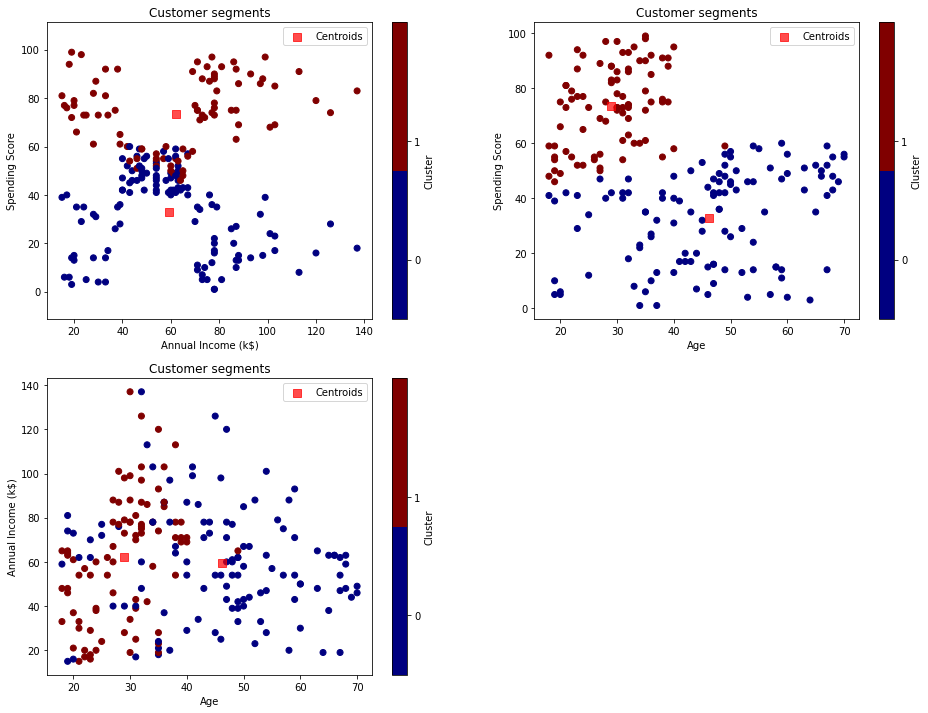

In [ ]:
# MODIFY HERE THE NUMBER OF CLUSTERS
# Def. number of clusters
#
numClusters = 2

##Fitting kmeans to the dataset
km = KMeans(n_clusters=numClusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y = km.fit_predict(X)

# Cluster centroids
print('\n Cluster centroids ------------- ')
print( pd.DataFrame(km.cluster_centers_,columns=['Genre', 'Age', 'Anual Income', 'Spending Score']) )
print('\n')

# Visualization

plt.figure( figsize=(16, 12) )
plt.subplot(221)
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.get_cmap('jet', numClusters))
plt.colorbar(ticks=range(numClusters), label='Cluster')
plt.clim(-0.5, numClusters)
plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,3],s=50,marker='s', c='red', alpha=0.7, label='Centroids')
plt.axis('equal')
plt.title('Customer segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()

plt.subplot(222)
plt.scatter(X[:, 1], X[:, 3], c=y, cmap=plt.cm.get_cmap('jet', numClusters))
plt.colorbar(ticks=range(numClusters), label='Cluster')
plt.clim(-0.5, numClusters)
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,3],s=50,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()

plt.subplot(223)
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.get_cmap('jet', numClusters))
plt.colorbar(ticks=range(numClusters), label='Cluster')
plt.clim(-0.5, numClusters)
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,2],s=50,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()

plt.show()